# Lab 5-2: Water vapor fluxes at Kettle Ponds

Written by Eli Schwat - January 2024.

In [1]:
import xarray as xr
import numpy as np
import os 
import urllib
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import altair as alt

## SOS Data

In [2]:
sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)

## Case study analysis

In this lab, we will examine the major wind event of 22 December 2022.

Let's examine all the water-related measurements at Kettle Ponds.

This includes: 
* Blowing snow fluxes
* Latent heat fluxes
* Snow pillow SWE

In [4]:
# Here, we sum the two vertically stacked measurements of blowing snow flux to calculate
# the total blowing snow flux between 0 and 2 meters above ground level
sos_dataset['SF_avg_ue'] = sos_dataset['SF_avg_1m_ue'] + sos_dataset['SF_avg_2m_ue']

In [10]:
from metpy.units import units
import pint_xarray

Both the blowing snow flux and the latent heat flux are in units of g/m^2/s. Let's convert them to mm/SWE. We do this by multiplying by the number of seconds in each 30-min time step (1800 s) and dividing by the density of water (approx. 1000 kg/m^3) and then multiplying by 1000 to convert from m to mm.

In [42]:
blowing_snow_flux_mm = (sos_dataset['SF_avg_ue'] * 1800/1000)

latent_heat_flux_mm = sos_dataset['w_h2o__3m_c_raw'] * 1800/1000

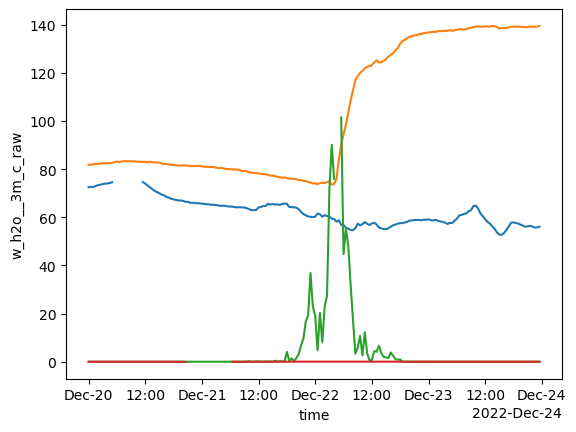

In [43]:
sos_dataset['SWE_p3_c'].sel(time = slice('20221220','20221223')).plot()
sos_dataset['SWE_p1_c'].sel(time = slice('20221220','20221223')).plot()
blowing_snow_flux_mm.sel(time = slice('20221220','20221223')).plot()
latent_heat_flux_mm.sel(time = slice('20221220','20221223')).plot()

What does this tell us about the blowing snow event in December? Could sublimation have caused the significant divergence in the two snowpillow measurements? 

You already know the answer to this from the Lundquist et al., 2024 paper, but it's still cool to look at.

Let's zoom in on just the latent heat flux measurements. How much sublimated during this event?

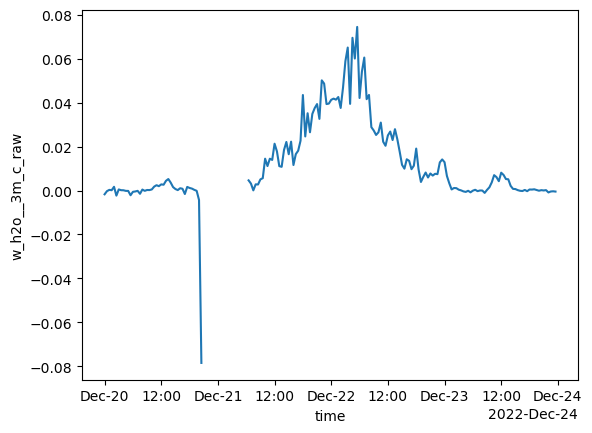

In [44]:
latent_heat_flux_mm.sel(time = slice('20221220','20221223')).plot()

If we calculate the cumulative sum of the time series above, we can see the total sublimation during the event. Also, notice that peak/dip early in the time series. Let's remove with a rolling median.

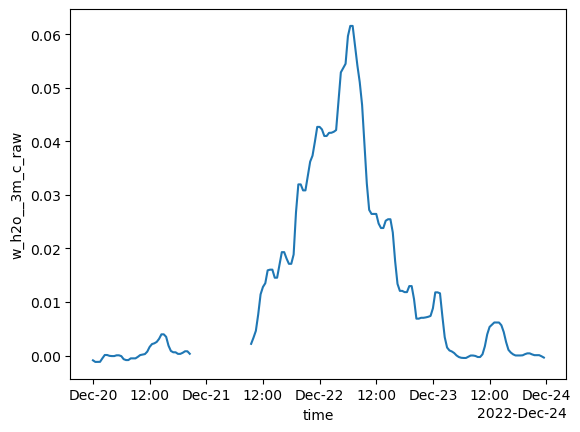

In [49]:
latent_heat_flux_mm = latent_heat_flux_mm.rolling(time=4).median()
latent_heat_flux_mm.sel(time = slice('20221220','20221223')).plot()

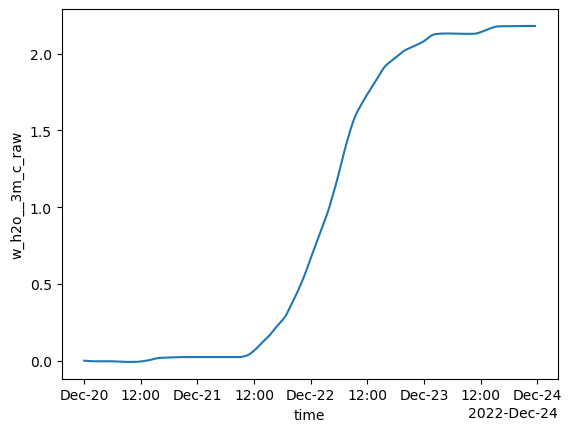

In [53]:
latent_heat_flux_mm.sel(time = slice('20221220','20221223')).cumsum().plot()